# Superstore Marketing Campaign
---
## Context
A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499 dollars which is 999 dollars on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

---
## Objective
The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.

In [1]:
### Import necessary libraries

# For data handling and manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# For machine learning algorithms and functions
import sklearn

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Set random seed values for reproducibility

# Set a seed value
SEED = 42
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(SEED)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(SEED)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(SEED)

# Data

In [3]:
# Load dataset
df = pd.read_csv('data/superstore_data.csv')

In [4]:
# See first 5 rows of dataframe
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [5]:
# See shape of dataframe
df.shape

(2240, 22)

# Exploratory Data Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Observations:
* Income has missing values
* 'Year_Birth' has a value of 1893 (outlier)
* 'Mnt' columns are amount spent on certain categories

In [7]:
# Get the dtypes of different columns
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [8]:
# 'Id' column not necessary, drop
df = df.drop('Id', axis=1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,...,47,48,78,2,5,2,11,4,0,0
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,...,3,8,16,1,1,0,3,8,0,0
2237,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,...,15,5,14,2,6,1,5,8,0,0
2238,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,...,149,165,63,1,5,4,10,3,0,0


In [9]:
# Create list of object or string type columns and numerical columns
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes(['int64', 'float64']).columns

# Print column lists
print(f'Categorical Columns: {cat_cols}\n')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

Numerical Columns: Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')


## Univariate Analysis

### Categorical Variables

In [10]:
# Get unique values for each catgorical column
for col in cat_cols:
    print(f'{col} column has {len(df[col].unique())}')
    print(df[col].unique(),'\n')

Education column has 5
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic'] 

Marital_Status column has 8
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd'] 

Dt_Customer column has 663
['6/16/2014' '6/15/2014' '5/13/2014' '11/5/2014' '8/4/2014' '3/17/2014'
 '1/29/2014' '1/18/2014' '11/1/2014' '12/27/2013' '9/12/2013' '7/12/2013'
 '10/16/2013' '5/10/2013' '11/9/2013' '1/8/2013' '7/23/2013' '1/7/2013'
 '5/28/2013' '3/26/2013' '3/15/2013' '12/2/2013' '11/23/2012' '10/13/2012'
 '9/14/2012' '6/29/2014' '5/31/2014' '5/30/2014' '4/27/2014' '11/4/2014'
 '10/29/2013' '9/10/2013' '10/5/2013' '9/5/2013' '4/25/2013' '4/20/2013'
 '3/30/2013' '1/3/2013' '2/14/2013' '11/1/2013' '3/1/2013' '12/19/2012'
 '12/15/2012' '2/12/2012' '9/17/2012' '11/9/2012' '12/5/2014' '4/28/2014'
 '3/29/2014' '6/3/2014' '4/3/2014' '4/2/2014' '3/2/2014' '1/1/2014'
 '12/12/2013' '11/15/2013' '9/20/2013' '5/9/2013' '8/31/2013' '7/30/2013'
 '7/27/2013' '6/22/2013' '5/1/2013' '11/21/2012' '11/11/2012' '9/28

Observations/Changes:
* For **Education**, change '2n Cycle' to 'Master'
* For **Marital_Status**, change ('Together' to 'Married) and ('YOLO', 'Alone', 'Absurd' to 'Single')
* For **Dt_Customer**, convert to datetime dtype and compute *days as a member*

In [11]:
# Replace '2n Cycle' values to 'Master'
df['Education'].replace('2n Cycle', 'Master', inplace=True)

# Check if replacement is successful
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [12]:
# Replace Marital Status values of 'Together' to 'Married'
df['Marital_Status'].replace('Together', 'Married', inplace=True)

# Replace Marital_Status values of 'YOLO', 'Alone', 'Absurd' to 'Single'
df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single', inplace=True)

df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Widow'], dtype=object)

### Feature Engineering (Categorical)

In [13]:
# Convert Dt_Customer to datetime dtype
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [14]:
# Check if conversion worked
df['Dt_Customer'].head()

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-11-05
4   2014-08-04
Name: Dt_Customer, dtype: datetime64[ns]

In [15]:
### Create a column for number of days a customer has been a member

# Set present date to 2023-01-01 for consistency
df = df.assign(Present_Day='2023-01-01')
df['Present_Day'] = pd.to_datetime(df['Present_Day'])

# Create 'Days_as_Customer' column by subtracting date in column with present date
df['Days_as_Customer'] = (df['Present_Day'] - df['Dt_Customer']) / np.timedelta64(1, 'D')

# Remove 'Present_Day' and 'Dt_Customer' column
df.drop('Present_Day', axis=1, inplace=True)
df.drop('Dt_Customer', axis=1, inplace=True)

df['Days_as_Customer']

0       3121.0
1       3122.0
2       3155.0
3       2979.0
4       3072.0
         ...  
2235    3469.0
2236    3631.0
2237    3947.0
2238    3685.0
2239    4010.0
Name: Days_as_Customer, Length: 2240, dtype: float64

In [16]:
# Add 'Days_as_Customer' to num_cols
num_cols = df.select_dtypes(['int64', 'float64']).columns

print(f'Numerical Columns: {num_cols}')

Numerical Columns: Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Days_as_Customer'],
      dtype='object')


Text(0.5, 1.0, 'Distribution of Educational Attainment')

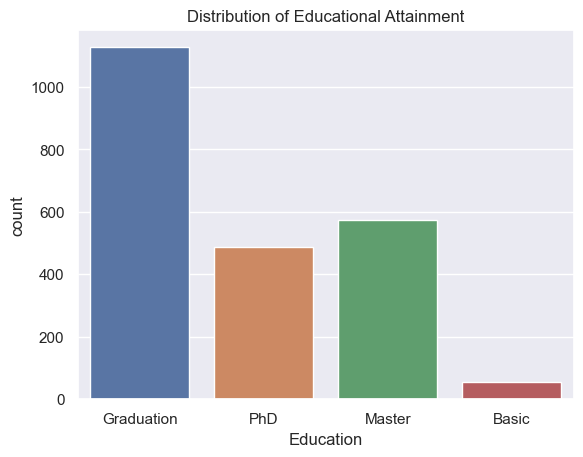

In [17]:
# What is the distribution of the differnt educational statuses?
sns.countplot(x=df['Education'])
plt.title('Distribution of Educational Attainment')

Text(0.5, 1.0, 'Distribution of Marital Statuses')

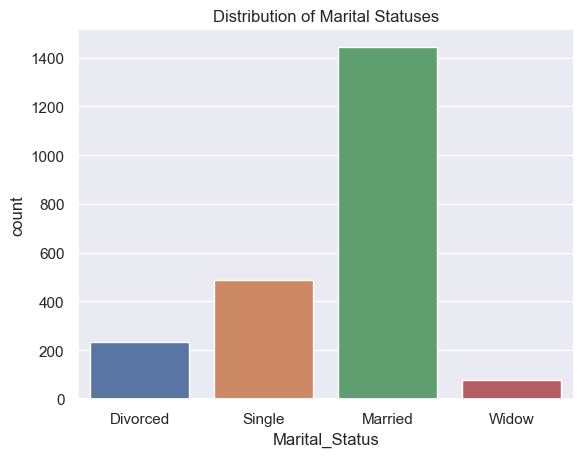

In [18]:
# What is the distribution of Marital Statuses
sns.countplot(x=df['Marital_Status'])
plt.title('Distribution of Marital Statuses')

### Numerical Variables

<function matplotlib.pyplot.show(close=None, block=None)>

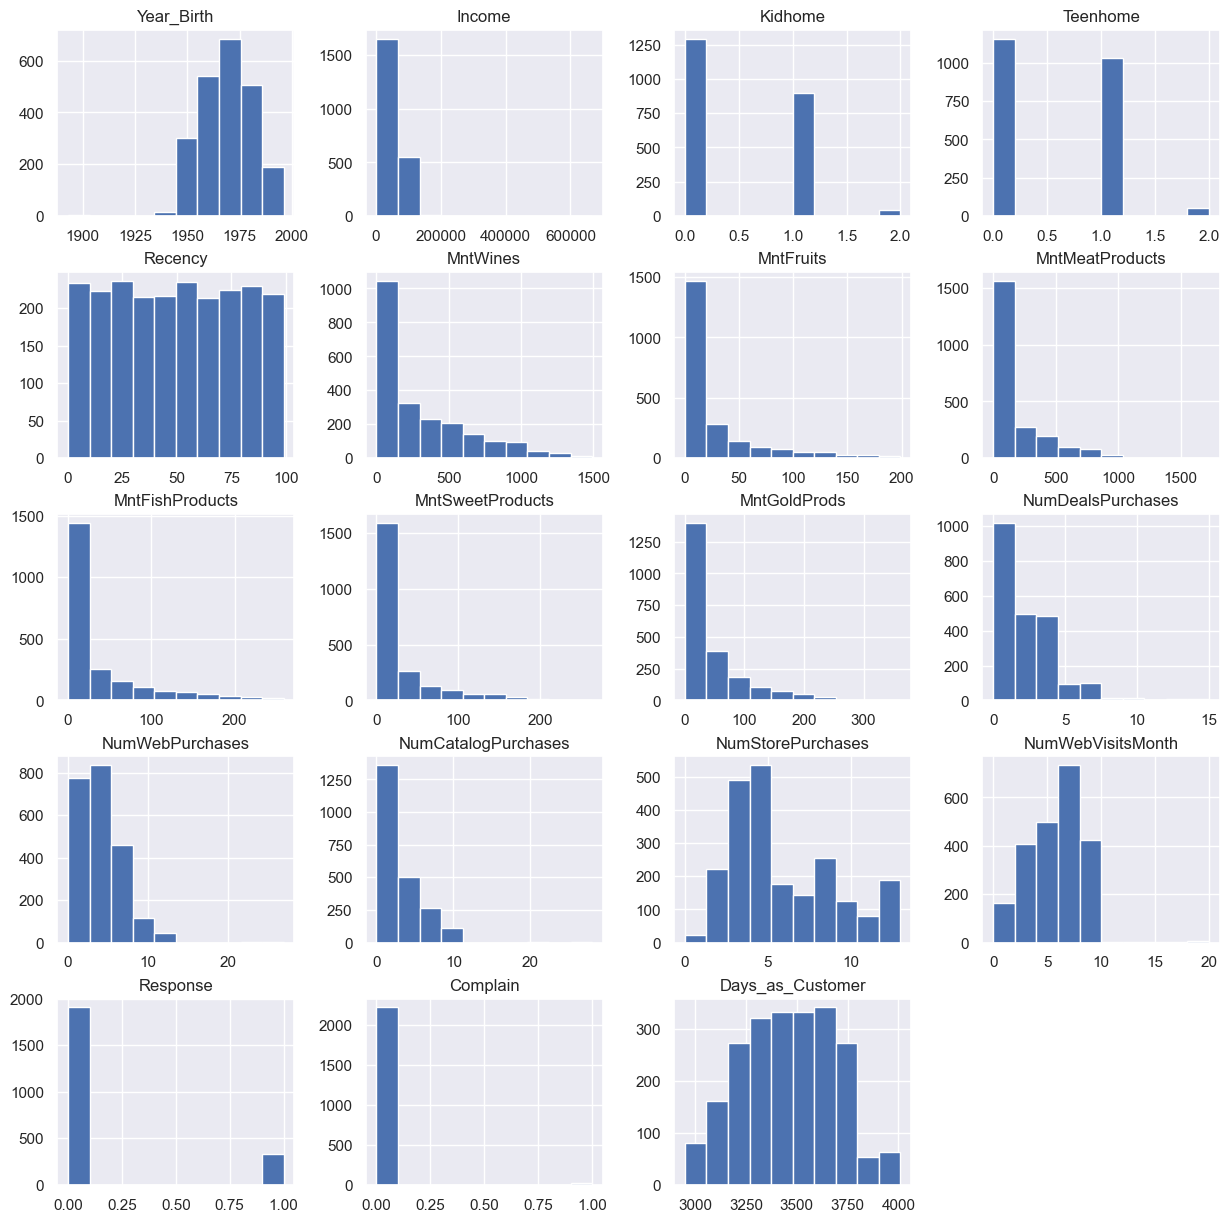

In [19]:
# Get overview plots of all numerical variables
df[num_cols].hist(figsize=(15, 15))
plt.show

Changes:
* For **Year_of_Birth**, create an *Age* column, check for outliers
* For **Mnt** variables, create *Total_Amount_Spent* variable, check for outliers
* For **Num__Purchases**, create *Total_Purchases* variable, check for outliers
* For **Income**, impute missing values with mean, check distribution for outliers
* For **MntMeatProducts, MntSweetProducts, MntGoldProducts**, check for outliers
* For **NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumWebVisitsMonth**, check outliers

Observations:
* There more people who declined the deal than those who accepted it in *Response*
* Only few *Complaints*

### Feature Engineering

In [20]:
### Create a column for age of customer

# Set present year to 2023 for consistency
df = df.assign(Present_Year=2023)

# Create 'Age' column by subtracting present date with year birth
df['Age'] = (df['Present_Year'] - df['Year_Birth']) 

# Remove 'Present_Day' and 'Year_Birth' column
df.drop('Present_Year', axis=1, inplace=True)
df.drop('Year_Birth', axis=1, inplace=True)

df['Age']

0       53
1       62
2       65
3       56
4       34
        ..
2235    47
2236    46
2237    47
2238    45
2239    54
Name: Age, Length: 2240, dtype: int64

In [21]:
### Create a column for 'TotalMntSpent' by adding all 'Mnt' columns

# Rename 'Mnt' columns to follow easier naming convention
df.rename(columns={'MntGoldProds' : 'MntGolds',
                   'MntMeatProducts' : 'MntMeats',
                   'MntFishProducts' : 'MntFishes',
                   'MntSweetProducts' : 'MntSweets'}, inplace=True)

# Create column
df['TotalMntSpent'] = df[['MntWines',
                          'MntFruits',
                          'MntMeats',
                          'MntFishes',
                          'MntSweets',
                          'MntGolds']].sum(axis=1)

df['TotalMntSpent']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: TotalMntSpent, Length: 2240, dtype: int64

In [22]:
# Create a 'Total_Purchases' column
df['Total_Purchases'] = df[['NumDealsPurchases',
                            'NumWebPurchases',
                            'NumCatalogPurchases',
                            'NumStorePurchases']].sum(axis=1)

df['Total_Purchases']

0       15
1       18
2       11
3        4
4        8
        ..
2235    20
2236     5
2237    14
2238    20
2239    18
Name: Total_Purchases, Length: 2240, dtype: int64

In [23]:
### Create function to create a boxplot and histogram of specific column

# Define function
def plot_hist_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Plots feature of dataframe in a boxplot and histogram.
    
    Parameters
    ----------
    data (dataframe): pandas dataframe.
    
    feature (str): column name of the pandas dataframe to plot.
    
    figsize (tuple, optional): size of the plots.
        Default=(12, 7)
        
    kde (bool): shows density curve.
        Default=False
        
    bins (int): number of bins in histogram.
        Default=None
    
    Returns
    -------
    A histogram and boxplot of the specified feature in a pandas dataframe.
    """
    # Create figure and subplots
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2,
                                          sharex=True,
                                          gridspec_kw={'height_ratios': (0.25, 0.75)},
                                          figsize=figsize)
    # Create boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="blue")
    # Create histogram
    sns.histplot(data=data, x=feature, ax=ax_hist)

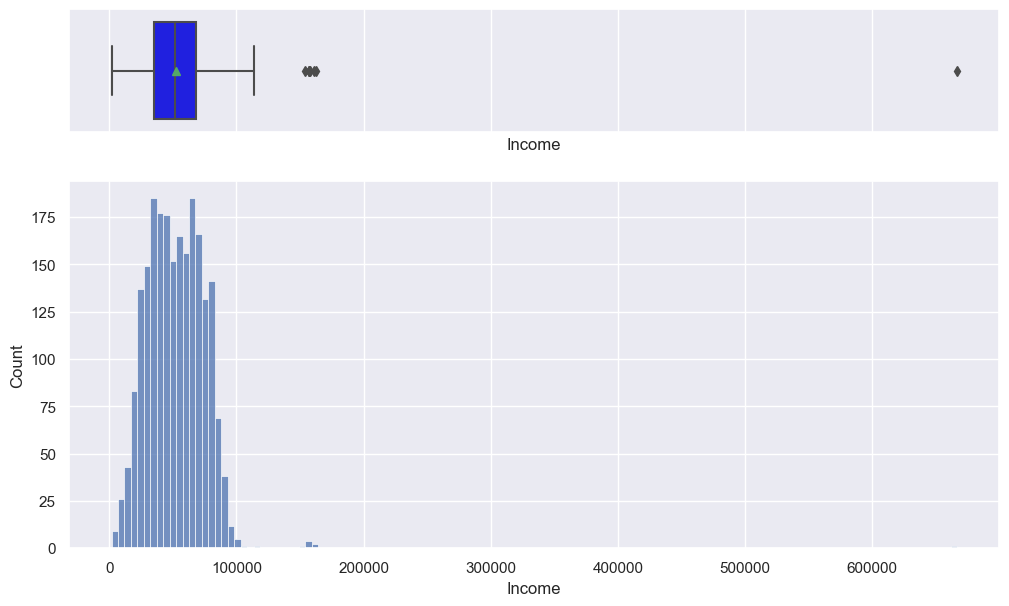

In [24]:
# Plot histogram and boxplot of 'Income'
plot_hist_boxplot(data=df, feature='Income')

In [25]:
# Look at outlier
df[df['Income'] > 200000] 

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeats,MntFishes,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Days_as_Customer,Age,TotalMntSpent,Total_Purchases
527,Graduation,Married,666666.0,1,0,23,9,14,18,8,...,3,1,3,6,0,0,3616.0,46,62,11


In [26]:
# Remove outlier
df.drop(index=df[df['Income'] > 200000].index, inplace=True)

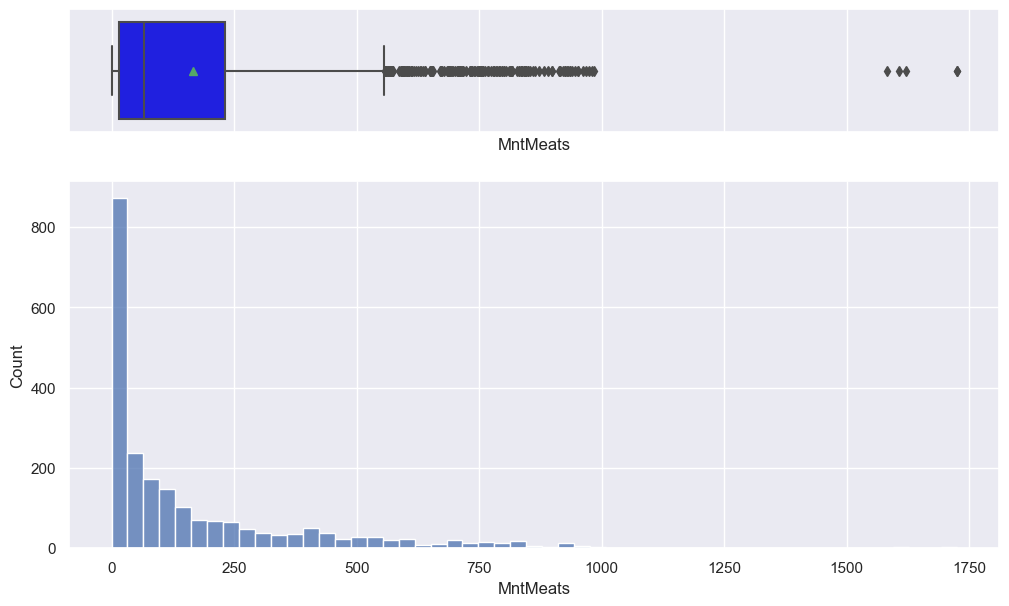

In [27]:
# Plot histo and boxplot for 'MntMeatProducts'
plot_hist_boxplot(df, feature='MntMeats')

In [28]:
# Check outliers
df[df['MntMeats'] > 1000]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeats,MntFishes,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Days_as_Customer,Age,TotalMntSpent,Total_Purchases
325,Graduation,Married,157146.0,0,0,13,1,0,1725,2,...,0,28,0,1,0,0,3534.0,46,1730,28
497,PhD,Married,160803.0,0,0,21,55,16,1622,17,...,0,28,1,0,0,0,3920.0,41,1717,44
961,Graduation,Married,2447.0,1,0,42,1,1,1725,1,...,0,28,0,1,0,0,3501.0,44,1730,43
1213,Master,Married,NaN,0,0,53,32,2,1607,12,...,0,0,1,0,0,0,3676.0,45,1679,1
2204,PhD,Married,157243.0,0,1,98,20,2,1582,1,...,0,22,0,0,0,0,3285.0,50,1608,37


In [29]:
# Drop rows of outliers
df.drop(index=df[df['MntMeats'] > 1000].index, inplace=True)

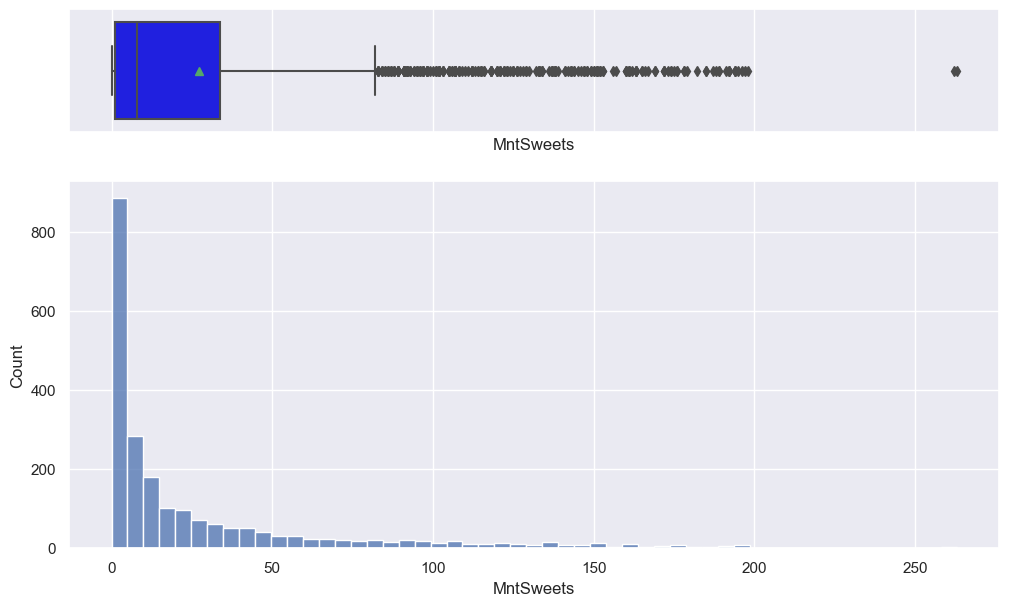

In [30]:
# Check outliers for 'MntSweets'
plot_hist_boxplot(df, feature='MntSweets')

In [31]:
# Check outliers
df[df['MntSweets'] > 200]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeats,MntFishes,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Days_as_Customer,Age,TotalMntSpent,Total_Purchases
210,PhD,Single,113734.0,0,0,9,6,2,3,1,...,27,0,0,1,0,0,3140.0,78,277,27
449,Graduation,Single,NaN,1,0,19,5,1,3,3,...,27,0,0,1,0,0,3602.0,37,637,27


In [32]:
# Drop outliers
df.drop(index=df[df['MntSweets'] > 200].index, inplace=True)

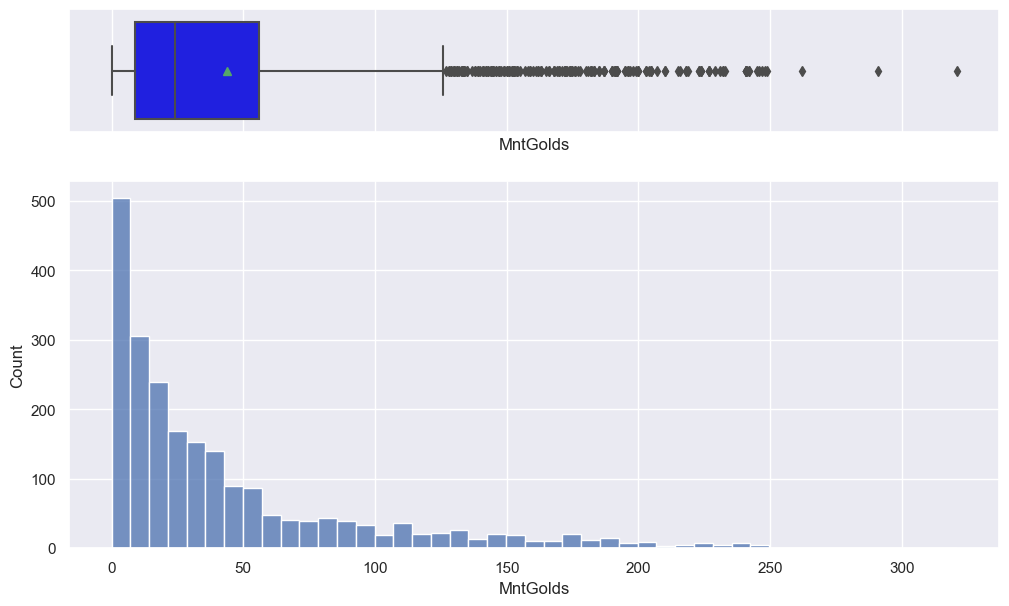

In [33]:
# Check outliers for 'MntGolds' 
plot_hist_boxplot(df, feature='MntGolds')

In [34]:
# Check outliers
df[df['MntGolds'] > 250]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeats,MntFishes,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Days_as_Customer,Age,TotalMntSpent,Total_Purchases
14,Graduation,Married,4428.0,0,1,0,16,4,12,2,...,25,0,0,1,0,0,3523.0,54,359,25
60,Master,Single,6560.0,0,0,2,67,11,26,4,...,1,0,1,17,0,0,3307.0,41,373,2
2063,PhD,Single,7144.0,0,2,92,81,4,33,5,...,23,1,1,0,0,0,3460.0,57,416,25


In [35]:
# Drop outliers
df.drop(index=df[df['MntGolds'] > 250].index, inplace=True)

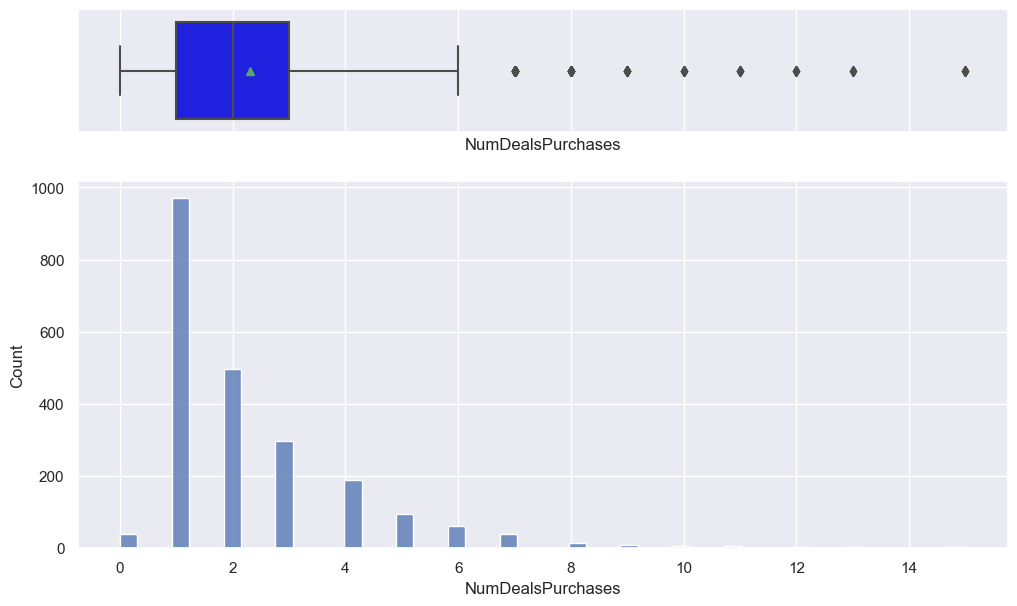

In [36]:
# Check outliers for 'NumDealsPurchases'
plot_hist_boxplot(df, feature='NumDealsPurchases')

No extraordinary outlier

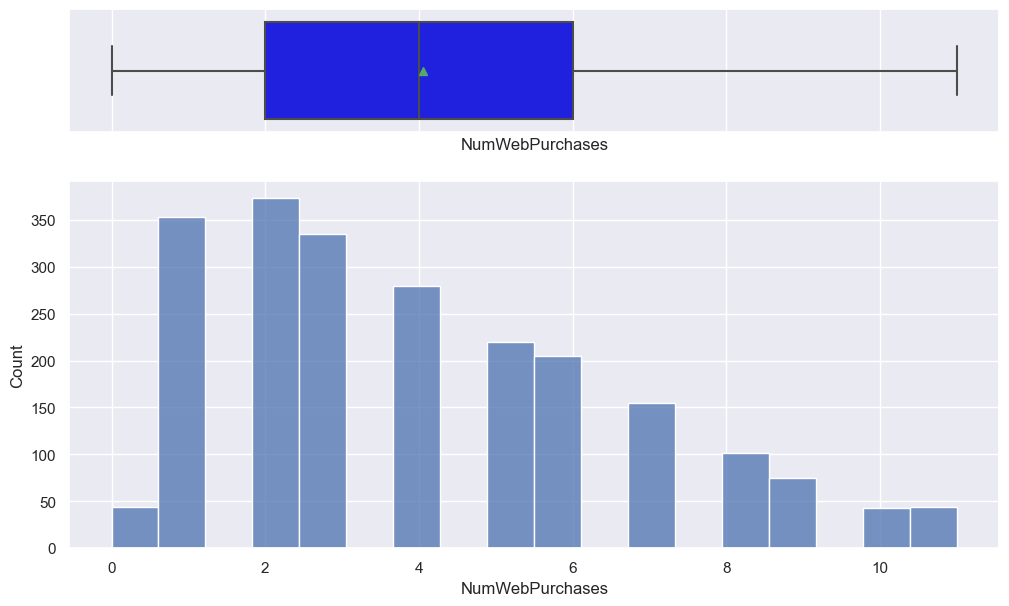

In [37]:
# Check 'NumWebPurchases'
plot_hist_boxplot(df, feature='NumWebPurchases')

Outliers must have been dropped already

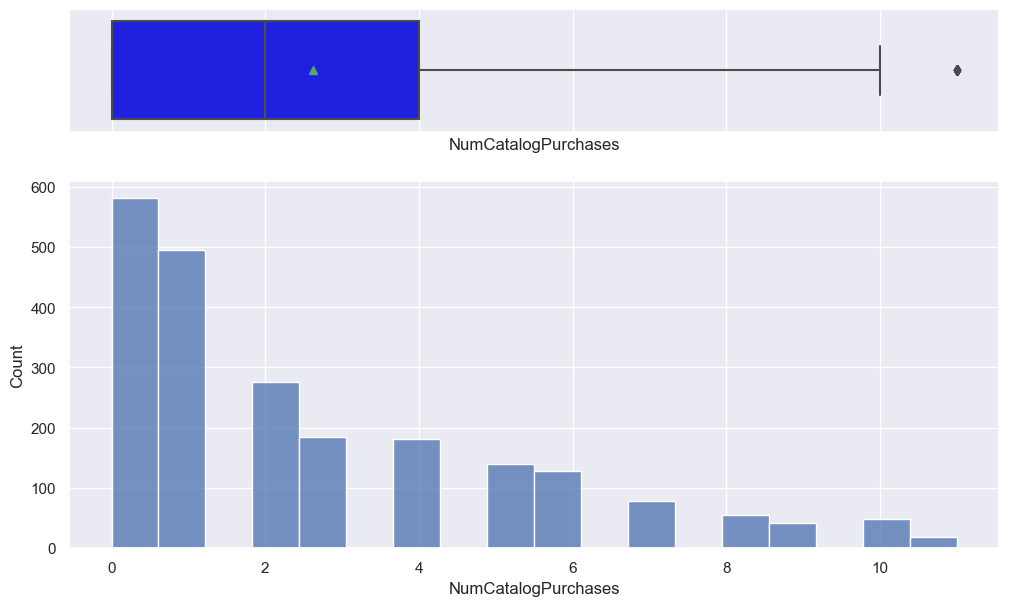

In [38]:
# Check outliers for 'NumCatalogPurchases'
plot_hist_boxplot(df, 'NumCatalogPurchases')

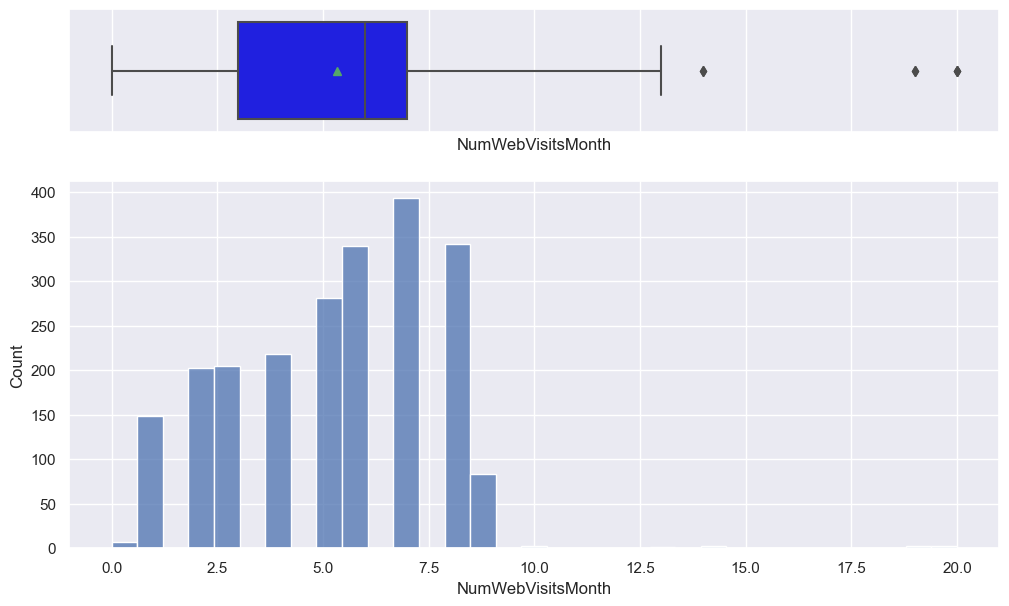

In [39]:
# Check outliers for 'NumWebVisitsMonth'
plot_hist_boxplot(df, 'NumWebVisitsMonth')

In [40]:
# Check outliers
df[df['NumWebVisitsMonth'] > 15]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeats,MntFishes,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Days_as_Customer,Age,TotalMntSpent,Total_Purchases
663,PhD,Married,4023.0,1,1,29,5,0,1,1,...,0,0,0,19,0,0,3114.0,60,9,15
1416,Graduation,Single,8028.0,0,0,62,73,18,66,7,...,0,1,0,19,0,0,3757.0,32,178,16
1466,Graduation,Divorced,1730.0,0,0,65,1,1,3,1,...,0,0,0,20,0,0,3150.0,52,8,15
1533,PhD,Married,5648.0,1,1,68,28,0,6,1,...,1,0,0,20,0,0,3216.0,73,49,2
1721,PhD,Married,6835.0,0,1,76,107,2,12,2,...,0,0,1,20,0,0,3794.0,66,137,1


In [41]:
# Drop outliers
df.drop(index=df[df['NumWebVisitsMonth'] > 15].index, inplace=True)

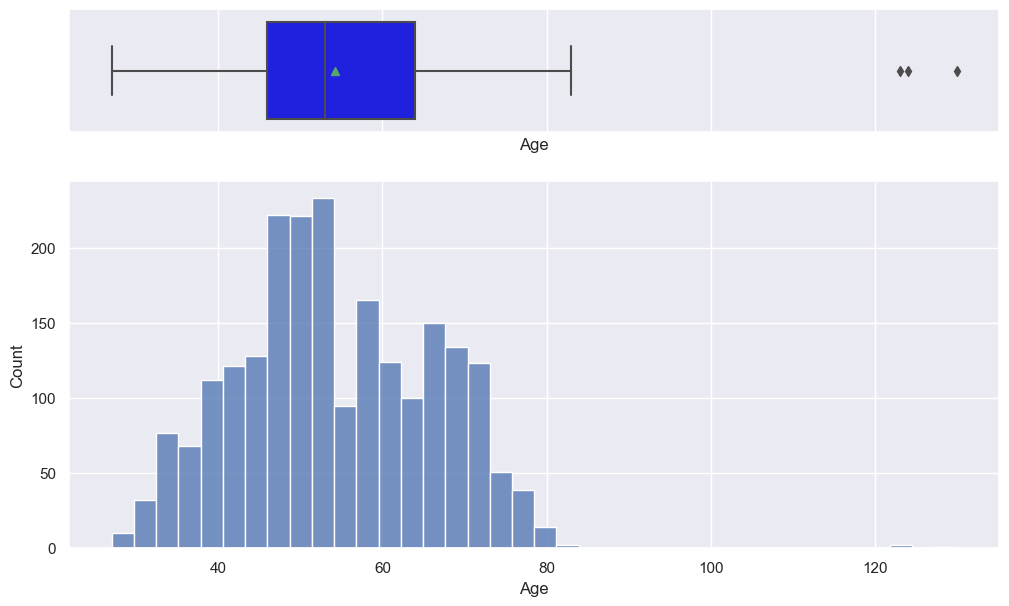

In [42]:
# Check outliers for 'Age'
plot_hist_boxplot(df, 'Age')

In [43]:
# Check outliers
df[df['Age'] > 100]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeats,MntFishes,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Days_as_Customer,Age,TotalMntSpent,Total_Purchases
513,Master,Single,60182.0,0,1,23,8,0,5,7,...,1,0,2,4,0,0,3151.0,130,22,4
827,PhD,Married,83532.0,0,0,36,755,144,562,104,...,4,6,4,1,0,0,3384.0,124,1853,15
2233,Master,Divorced,36640.0,1,0,99,15,6,8,7,...,2,1,2,5,0,1,3384.0,123,65,6


In [44]:
# Drop outliers
df.drop(index=df[df['Age'] > 100].index, inplace=True)

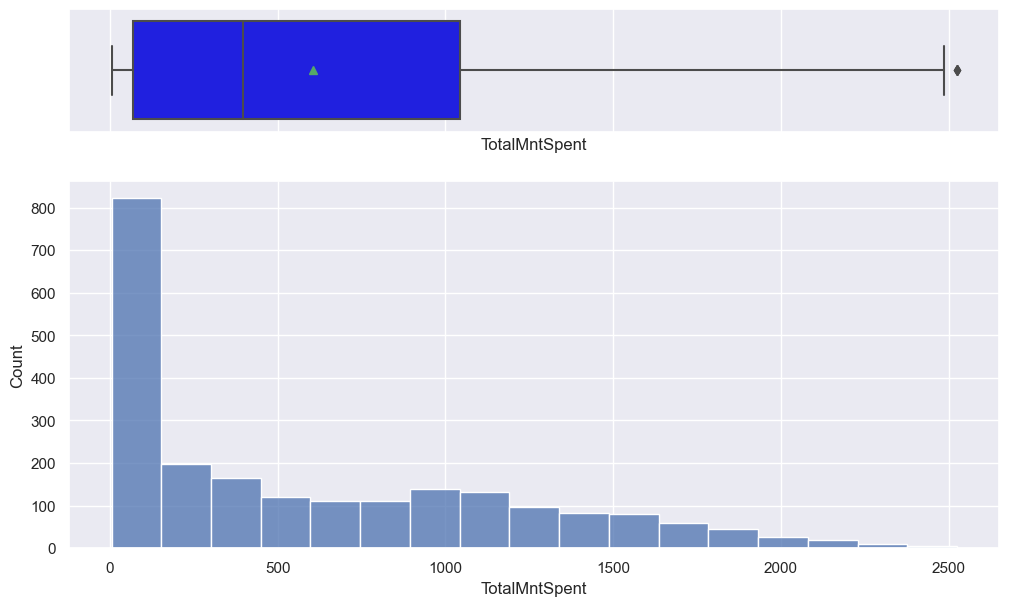

In [45]:
# Plot 'TotalMntSpent'
plot_hist_boxplot(df, 'TotalMntSpent')

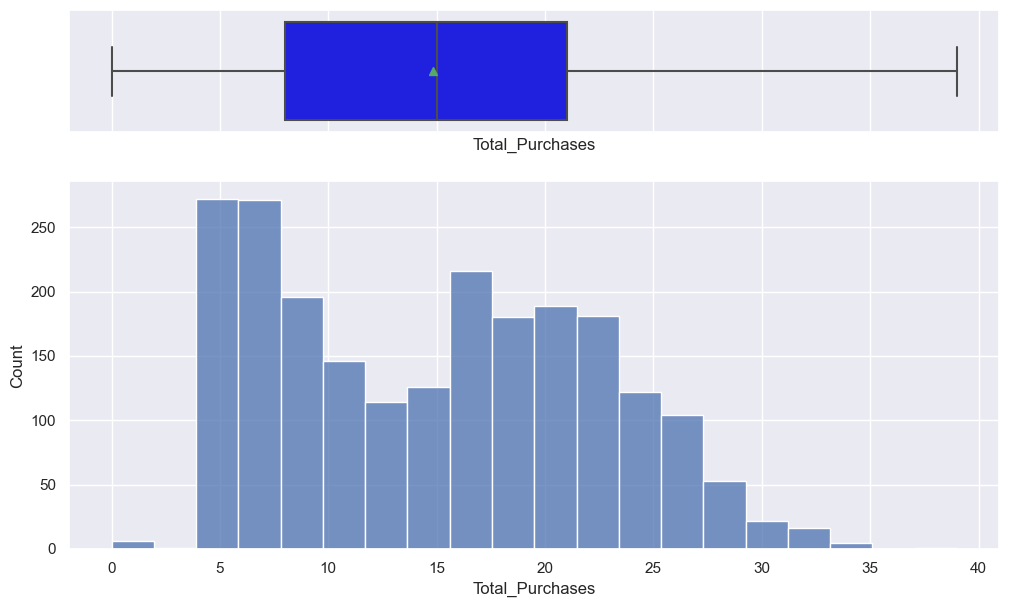

In [46]:
# Plot 'Total_Purchases'
plot_hist_boxplot(df, 'Total_Purchases')

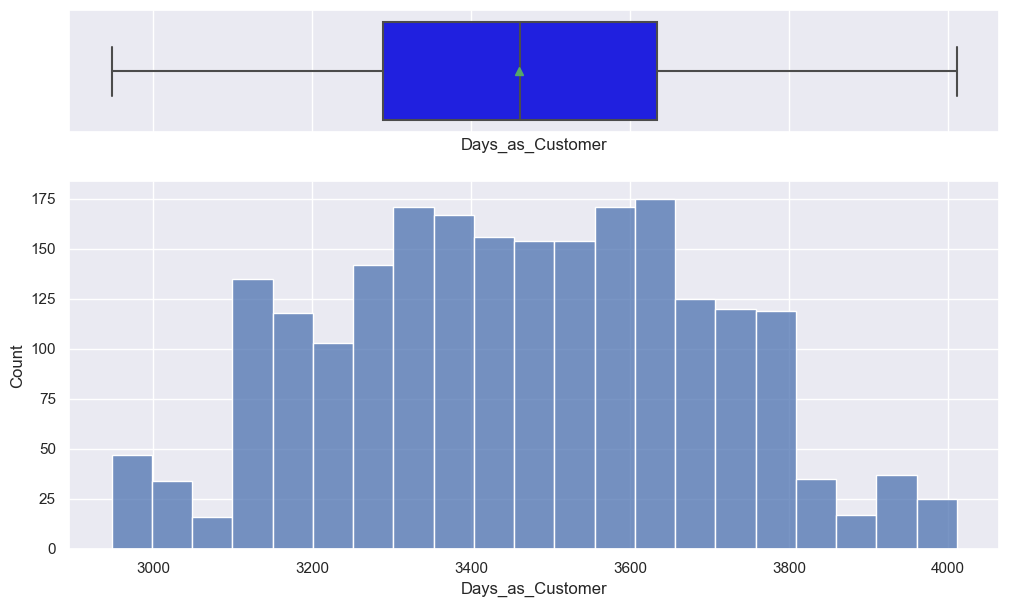

In [47]:
# Plot 'Days_as_Customer'
plot_hist_boxplot(df, feature='Days_as_Customer')

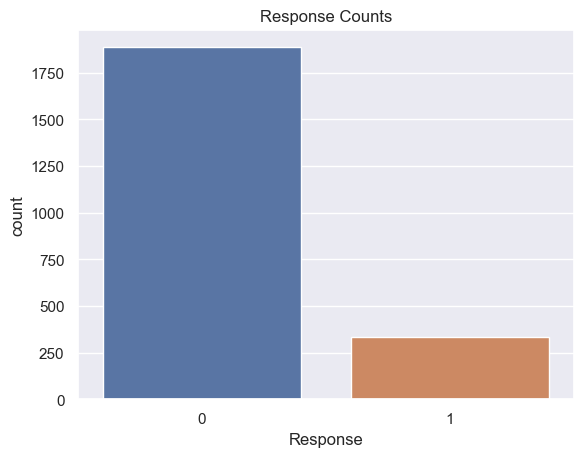

In [48]:
# Plot 'Response'
sns.countplot(df, x='Response')
plt.title('Response Counts')
plt.show()

There are more of the '0' class than '1' which means most people declined the deal.

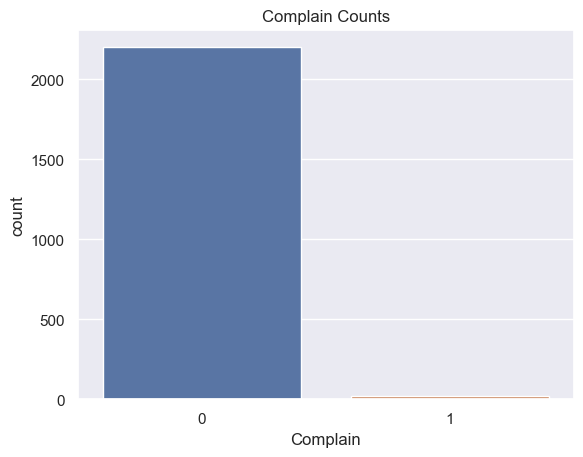

In [49]:
# Plot 'Complain'
sns.countplot(df, x='Complain')
plt.title('Complain Counts')
plt.show()

### Bivariate Analysis

<AxesSubplot: >

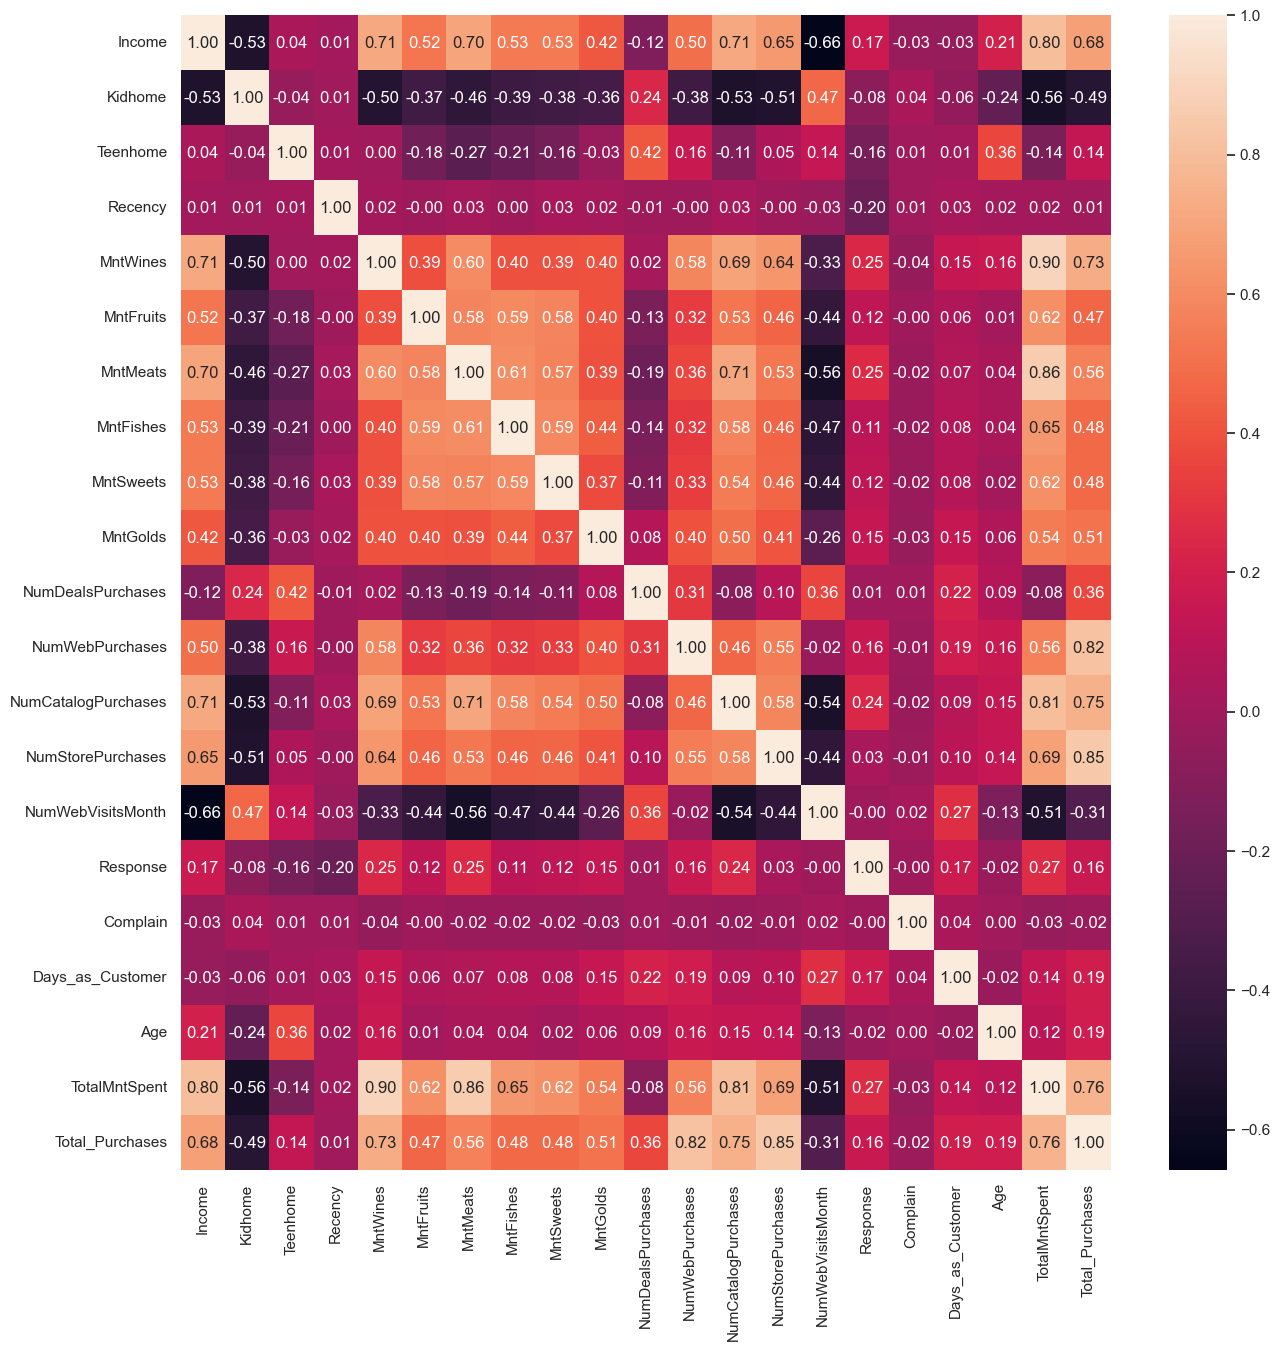

In [50]:
# Plot correlation matrix to see correlated variables
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Observations:
* *Response* variable has some positive correlation with *Income, MntWines, MntMeats, NumCatalogPurchases, and TotalMntSpent*
* Higher *Income* means more buying capacity.
* Customers who buy more wines and meats are more likely to purchase from the deal.
* *NumWebVisitsMonth* has strong negative correlation with amounts spent.
* Try to normalize item category prices (might affecting correlation)

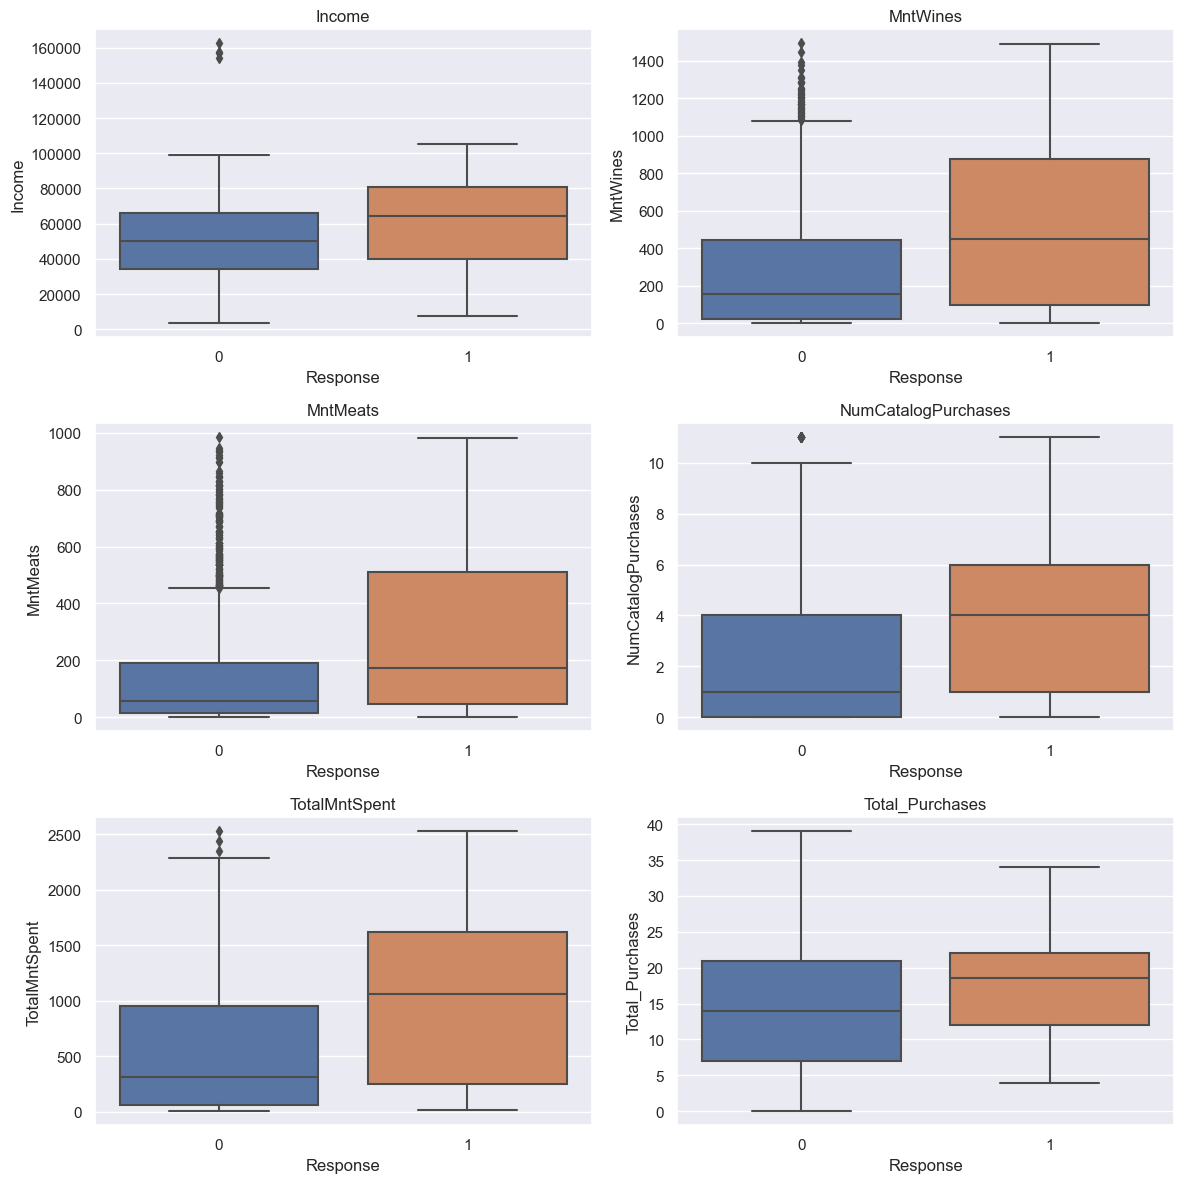

In [51]:
# Cross check Response with correlated variables
cols = ['Income', 'MntWines', 'MntMeats', 'NumCatalogPurchases', 'TotalMntSpent', 'Total_Purchases']

plt.figure(figsize=(12, 12))

for i, variable in enumerate(cols):
    plt.subplot(3,2, i + 1)
    sns.boxplot(x=df['Response'], y=df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

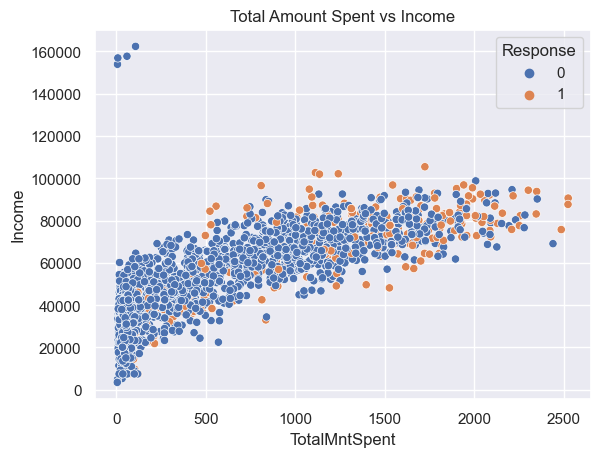

In [52]:
# Analyze Income vs TotalMnt Spent
sns.scatterplot(df, x='TotalMntSpent', y='Income', hue='Response')
plt.title('Total Amount Spent vs Income')
plt.show()

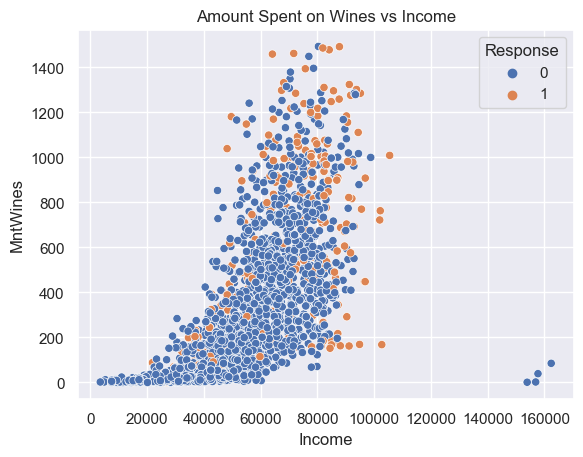

In [53]:
# Amount spent on wines vs income
sns.scatterplot(df, x='Income', y='MntWines', hue='Response')
plt.title('Amount Spent on Wines vs Income')
plt.show()

In [54]:
# Last check of current state of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2221 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2221 non-null   object 
 1   Marital_Status       2221 non-null   object 
 2   Income               2199 non-null   float64
 3   Kidhome              2221 non-null   int64  
 4   Teenhome             2221 non-null   int64  
 5   Recency              2221 non-null   int64  
 6   MntWines             2221 non-null   int64  
 7   MntFruits            2221 non-null   int64  
 8   MntMeats             2221 non-null   int64  
 9   MntFishes            2221 non-null   int64  
 10  MntSweets            2221 non-null   int64  
 11  MntGolds             2221 non-null   int64  
 12  NumDealsPurchases    2221 non-null   int64  
 13  NumWebPurchases      2221 non-null   int64  
 14  NumCatalogPurchases  2221 non-null   int64  
 15  NumStorePurchases    2221 non-null   i

## Modeling
-----
Steps:
1. Create train, test, val split
2. Imputer: impute missing values of *Income*
3. OneHotEncoder: one hot encode *Education* and *Marital_Status*
4. Normalize input data
5. Set up metrics checkers for model performance (both coarse and fine-grain metrics)
6. Train model using StratifiedKFold
7. Evaluate models
8. Tune hyperparamters of best models using RandomizedGridSearch
9. Re-train using best parameters
10. Re-evaluate models

In [55]:
from sklearn.model_selection import train_test_split

# Create a function that creates a train, test, and validation split
def create_train_test_val_split(X, y, test_frac=0.2, val_frac=0.25, random_state=42):
    """
    Creates a train, test, and validation split of the dataset.
    
    Parameters
    ----------
    X (dataframe): input columns.

    y (dataframe): single column for output.
    
    test_frac (float): fraction of dataset to be used as the test split.
    
    val_frac (float): fraction of dataset to be used as the validation split.

    random_state (int): seed for generating randomness of splits.
        Default=42
    
    Returns
    -------
    X_train, X_val, X_test, y_train, y_val, y_test data splits.
    """
    
    # Split training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac, random_state=random_state, stratify=y)
    
    # Split training into training and validation data
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_frac, random_state=random_state, stratify=y_train)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [56]:
# Split dataframe into X and y splits
X = df.drop('Response', axis='columns')
y = df['Response']

In [57]:
# Create train, test, and val splits
X_train, X_val, X_test, y_train, y_val, y_test = create_train_test_val_split(X, y)

In [58]:
# Check shapes of splits
print(X_train.shape, X_val.shape, X_test.shape)

(1332, 22) (444, 22) (445, 22)


In [59]:
from sklearn.impute import SimpleImputer

# Initialize imputer class
imputer = SimpleImputer(strategy='median')

# Impute missing values on X data
X_train['Income'] = imputer.fit_transform(X_train['Income'].values.reshape(-1,1))
X_val['Income'] = imputer.fit_transform(X_val['Income'].values.reshape(-1,1))
X_test['Income'] = imputer.fit_transform(X_test['Income'].values.reshape(-1,1))


In [60]:
# OH Encode categorical values for train, test, and validation dataframes
X_train_enc = pd.get_dummies(data=X_train, columns=['Education', 'Marital_Status'])
X_val_enc = pd.get_dummies(data=X_val, columns=['Education', 'Marital_Status'])
X_test_enc = pd.get_dummies(data=X_test, columns=['Education', 'Marital_Status'])

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler class
minmax_scaler = MinMaxScaler()

# Fit and transform dataframe to scaler
X_train_scaled = minmax_scaler.fit_transform(X_train_enc)
X_test_scaled = minmax_scaler.fit_transform(X_test_enc)
X_val_scaled = minmax_scaler.fit_transform(X_val_enc)

In [62]:
# Check if scaling worked
print(X_train_scaled.shape)
X_train_scaled

(1332, 28)


array([[0.44696606, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.20339596, 0.5       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.2635092 , 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.49255901, 0.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.36675588, 0.5       , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.13436536, 0.5       , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [63]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Create function to compute different performance metrics and plot confusion matrix
def evaluate_model(model, to_predict, y_true):
    """
    Function that makes a prediction using given model and computes performance metrics.

    Parameters
    ----------
    model (estimator): machine learning model to be evaluated.

    to_predict (iterable): input data to be predicted on.

    y_true (iterable): true y values of input data.

    Returns
    -------
    List containing accuracy, recall, precision, and f1 scores or model.
    """

    # Make predictions using model
    y_preds = model.predict(to_predict)

    # Compute performance metrics
    accuracy = accuracy_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    # Create performance metrics dictionary
    perf_metrics = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    }

    return perf_metrics

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create list of models
models = []

# Append models to list
models.append(('Logistic Regression', LogisticRegression(random_state=SEED)))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=SEED)))
models.append(('SVC', SVC(random_state=SEED)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Gaussian NB', GaussianNB()))

# Get cross validation score of all models
print('Cross-validation Scores: \n')

# Create empty list for results
results = []

# Loop through all models and perform StratifiedKFold
for name, model in models:
    # Initialize KFold class
    kfold = StratifiedKFold(shuffle=True, random_state=SEED)

    # Get cross validation score
    cv_results = cross_val_score(estimator=model,
                                 X=X_train_scaled,
                                 y=y_train,
                                 scoring='f1',
                                 cv=kfold)
    
    # Append model cv_results to results list
    results.append(cv_results)

    # Print scores
    print(f'{name}: {cv_results.mean() * 100}')

Cross-validation Scores: 

Logistic Regression: 38.99445397897554
Decision Tree: 33.82959777023839
SVC: 13.867871259175606
KNN: 21.567276927923825
Gaussian NB: 36.7972272978727


In [65]:
### Test models on validation data

print('Model Performance on Validation Data')

# Create empty dictionary for performance results
perf_results = {}

# Loop through models, train on training data and predict on validation data
for name, model in models:
    model.fit(X_train_scaled, y_train)
    perf_results[name] = evaluate_model(model, X_val_scaled, y_val)

# Create dataframe of results
perf_results = pd.DataFrame(perf_results).T
perf_results

Model Performance on Validation Data


,Accuracy,Recall,Precision,F1
Logistic Regression,0.846847,0.208955,0.482759,0.291667
Decision Tree,0.815315,0.328358,0.372881,0.349206
SVC,0.858108,0.134328,0.642857,0.222222
KNN,0.851351,0.149254,0.526316,0.232558
Gaussian NB,0.702703,0.492537,0.251908,0.333333


<AxesSubplot: >

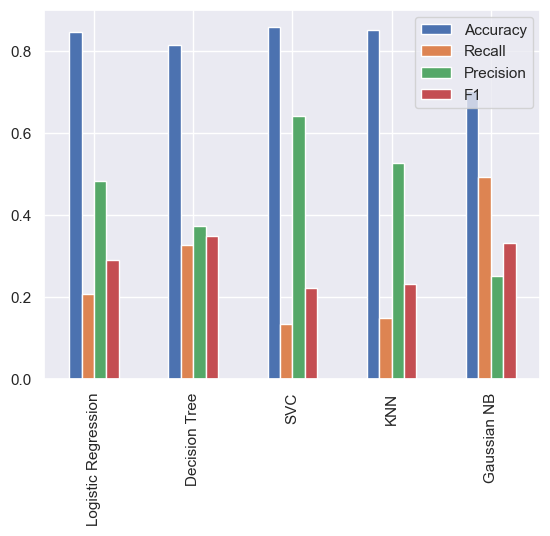

In [66]:
# Visualize results
perf_results.plot(kind='bar')

In [67]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

# Create empty list of ensemble models
ens_models = []

# Append ensemble model classifiers to list
ens_models.append(('Voting', VotingClassifier(estimators=models)))
ens_models.append(('Stacking', StackingClassifier(estimators=models)))
ens_models.append(('Bagging', BaggingClassifier(random_state=SEED)))
ens_models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=SEED)))
ens_models.append(('Random Forest', RandomForestClassifier(random_state=SEED)))
ens_models.append(('AdaBoost', AdaBoostClassifier(random_state=SEED)))

# Get cross validation score of all models
print('Cross-validation Scores of Ensemble Models: \n')

# Create empty list for results
results_ens = []

# Loop through all models and perform StratifiedKFold
for name, model in ens_models:
    # Initialize KFold class
    kfold = StratifiedKFold(shuffle=True, random_state=SEED)

    # Get cross validation score
    cv_results_ens = cross_val_score(estimator=model,
                                 X=X_train_scaled,
                                 y=y_train,
                                 scoring='f1',
                                 cv=kfold)
    
    # Append model cv_results to results list
    results_ens.append(cv_results_ens)

    # Print scores
    print(f'{name}: {cv_results_ens.mean() * 100}')

Cross-validation Scores of Ensemble Models: 

Voting: 32.301057433132904
Stacking: 38.634419674746965
Bagging: 33.86989534808374
Gradient Boosting: 43.030927394361676
Random Forest: 28.579858407067942
AdaBoost: 44.513646024030464


In [68]:
### Test models on validation data

print('Ensemble Model Performance on Validation Data')

# Create empty dictionary for performance results
perf_results_ens = {}

# Loop through models, train on training data and predict on validation data
for name, model in ens_models:
    model.fit(X_train_scaled, y_train)
    perf_results_ens[name] = evaluate_model(model, X_val_scaled, y_val)

# Create dataframe of results
perf_results_ens = pd.DataFrame(perf_results_ens).T
perf_results_ens

Ensemble Model Performance on Validation Data


,Accuracy,Recall,Precision,F1
Voting,0.858108,0.194030,0.590909,0.292135
Stacking,0.858108,0.223881,0.576923,0.322581
Bagging,0.853604,0.298507,0.526316,0.380952
Gradient Boosting,0.876126,0.298507,0.714286,0.421053
Random Forest,0.869369,0.238806,0.695652,0.355556
AdaBoost,0.851351,0.343284,0.511111,0.410714


*Boosting* (gradient & ada) seems to perform the best. *Gradient boosting* has the highest **precision score** while *AdaBoost* has the highest **recall score**.

#### Fine-tuning
---

#### Gradient Boosting Fine-tuning

In [94]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Initialize gradient boosting classifer
gbm = GradientBoostingClassifier(random_state=SEED)

# Set parameters
param_grid_gbm_random={
            'n_estimators': np.arange(25, 200, 5),
            'learning_rate': [0.2, 0.01, 0.05, 1],
            'subsample':[0.2, 0.3, 0.4, 0.5, 0,6, 0,7],
            'max_features':[0.5, 0.6, 0.7, 0.8, 0.9, 1]
            }

# Create RandomizedSearchCV instance for gbm
gbm_randomized_cv = RandomizedSearchCV(estimator=gbm,
                                       param_distributions=param_grid_gbm_random,
                                       n_iter=100,
                                       scoring='f1',
                                       n_jobs=-1,
                                       random_state=SEED)

# Fit training data
gbm_randomized_cv.fit(X_train_scaled, y_train)

# Print parameters and score
print(f'Best Parameters:\n {gbm_randomized_cv.best_params_}')
print(f'\nBest Score:\n {gbm_randomized_cv.best_score_}')

Best Parameters:
 {'subsample': 0.5, 'n_estimators': 135, 'max_features': 0.5, 'learning_rate': 0.2}

Best Score:
 0.47943179684687554


In [95]:
# Turn cv results parameters into dataframe
df_gbm_randomized_cv = pd.DataFrame(gbm_randomized_cv.cv_results_['params'])

# Add rank_test_score
df_gbm_randomized_cv['rank_test_score'] = gbm_randomized_cv.cv_results_['rank_test_score']

# Show top 10 results
df_gbm_randomized_cv[df_gbm_randomized_cv['rank_test_score'] <= 10]

,subsample,n_estimators,max_features,learning_rate,rank_test_score
18,0.2,160,0.6,0.20,10
21,0.2,140,0.5,0.05,4
26,0.4,125,1.0,0.20,6
34,0.2,145,0.7,0.20,8
45,0.3,150,0.7,0.05,9
62,0.4,85,0.6,0.20,7
63,0.2,190,0.6,0.20,2
74,0.5,135,0.5,0.20,1
83,0.2,150,0.5,0.05,5
90,0.3,170,0.5,0.20,3


<AxesSubplot: xlabel='n_estimators', ylabel='rank_test_score'>

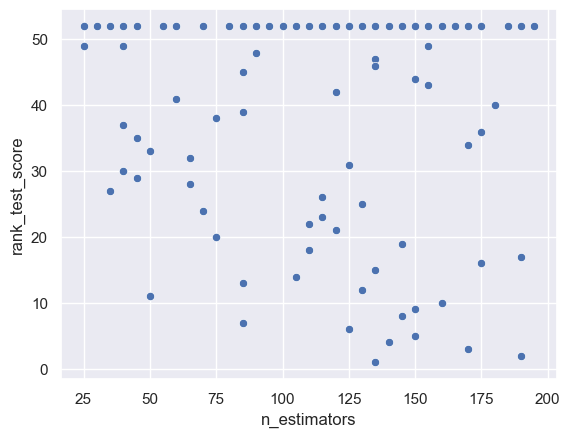

In [96]:
# Plot n_estimators
sns.scatterplot(df_gbm_randomized_cv, x='n_estimators', y='rank_test_score')

The best scores have parameters that range from:
* **n_estimaotrs**: 125 - 175
* **subsample**: 0.2 - 0.5
* **max_features**: 0.5 - 0.7
* **learning_rate**: 0.2

Perform gridsearchcv with these values in mind to get best hyperparamters

In [103]:
### Perform hyperparameter tuning using GridSearchCV and parameter values defined using randomized search

# Initialize estimator
gbm = GradientBoostingClassifier(random_state=SEED)

# Definer param grid
param_grid_gbm_grid = {
    'n_estimators': np.arange(125, 175),
    'learning_rate': [0.2],
    'subsample': np.arange(0.2, 0.5, 0.05),
    'max_features': np.arange(0.5, 0.7, 0.05)
}

# Create GridSearchCv instance for gbm
gbm_grid_cv = GridSearchCV(estimator=gbm,
                           param_grid=param_grid_gbm_grid,
                           n_jobs=-1,
                           scoring='f1',
                           verbose=1)

# Fit training data
gbm_grid_cv.fit(X_train_scaled, y_train)

# Print parameters and score
print(f'Best Parameters:\n {gbm_grid_cv.best_params_}')
print(f'\nBest Score:\n {gbm_grid_cv.best_score_}')

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters:
 {'learning_rate': 0.2, 'max_features': 0.55, 'n_estimators': 171, 'subsample': 0.44999999999999996}

Best Score:
 0.48508870214752564


In [104]:
### Train model using fine-tuned hyperparameters and test on validation data

gbm_tuned = GradientBoostingClassifier(learning_rate=0.2,
                                       max_features=0.55,
                                       n_estimators=170,
                                       subsample=0.5,
                                       random_state=SEED)

# Train model
gbm_tuned.fit(X_train_scaled, y_train)

# Evaluate performance on validation data
results_gbm_tuned = evaluate_model(gbm_tuned, X_val_scaled, y_val)
results_gbm_tuned


{'Accuracy': 0.8738738738738738,
 'Recall': 0.417910447761194,
 'Precision': 0.6222222222222222,
 'F1': 0.5}

#### AdaBoost Fine-tuning

In [112]:
# Initialize AdaBoost Classifier
ada = AdaBoostClassifier(random_state=SEED)

# Define hyperparameter
param_grid_ada_random = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Initalize randomizedsearcv
ada_randomized_cv = RandomizedSearchCV(estimator=ada,
                                       param_distributions=param_grid_ada_random,
                                       n_iter=150,
                                       scoring='f1',
                                       n_jobs=-1,
                                       random_state=SEED)

# Fit training data
ada_randomized_cv.fit(X_train_scaled, y_train)

# Print parameters and score
print(f'Best Parameters:\n {ada_randomized_cv.best_params_}')
print(f'\nBest Score:\n {ada_randomized_cv.best_score_}')

/Users/mikkaeljardin/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/mikkaeljardin/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/mikkaeljardin/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/mikkaeljardin/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/mikkaeljardin/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_ba

Best Parameters:
 {'n_estimators': 80, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}

Best Score:
 0.47731122883936183


In [113]:
# Turn cv results parameters into dataframe
df_ada_randomized_cv = pd.DataFrame(ada_randomized_cv.cv_results_['params'])

# Add rank_test_score
df_ada_randomized_cv['rank_test_score'] = ada_randomized_cv.cv_results_['rank_test_score']

# Show top 10 results
df_ada_randomized_cv[df_ada_randomized_cv['rank_test_score'] <= 10]

,n_estimators,learning_rate,base_estimator,rank_test_score
44,50,1.0,"DecisionTreeClassifier(max_depth=1, random_sta...",7
45,60,1.0,"DecisionTreeClassifier(max_depth=1, random_sta...",4
46,70,1.0,"DecisionTreeClassifier(max_depth=1, random_sta...",3
47,80,1.0,"DecisionTreeClassifier(max_depth=1, random_sta...",1
48,90,1.0,"DecisionTreeClassifier(max_depth=1, random_sta...",2
49,100,1.0,"DecisionTreeClassifier(max_depth=1, random_sta...",8
90,10,1.0,"DecisionTreeClassifier(max_depth=2, random_sta...",10
91,20,1.0,"DecisionTreeClassifier(max_depth=2, random_sta...",9
92,30,1.0,"DecisionTreeClassifier(max_depth=2, random_sta...",5
93,40,1.0,"DecisionTreeClassifier(max_depth=2, random_sta...",6


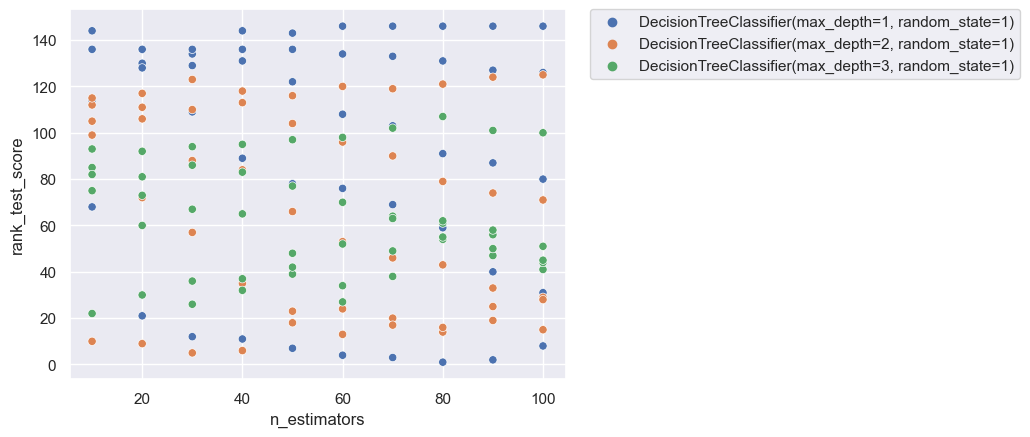

In [114]:
# Plot n_estimators
sns.scatterplot(df_ada_randomized_cv, x='n_estimators', y='rank_test_score', hue='estimator')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

The best scores have parameters that range from:
* **n_estimators**: 50 - 100
* **learning_rate**: 0.1
* **estimator**: DecisionTree with depth 1 - 2

Perform gridsearchcv with these values in mind to get best hyperparamters

In [120]:
### Perform hyperparameter tuning using GridSearchCV and parameter values defined using randomized search

# Initialize estimator
ada = AdaBoostClassifier(random_state=SEED)

# Definer param grid
param_grid_ada_grid = {
    'n_estimators': np.arange(50, 100),
    'learning_rate': [1],
    'estimator': [DecisionTreeClassifier(max_depth=1, random_state=SEED),
                  DecisionTreeClassifier(max_depth=2, random_state=SEED)]
}

# Create GridSearchCv instance for ada
ada_grid_cv = GridSearchCV(estimator=ada,
                           param_grid=param_grid_ada_grid,
                           n_jobs=-1,
                           scoring='f1',
                           verbose=1)

# Fit training data
ada_grid_cv.fit(X_train_scaled, y_train)

# Print parameters and score
print(f'Best Parameters:\n {ada_grid_cv.best_params_}')
print(f'\nBest Score:\n {ada_grid_cv.best_score_}')

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters:
 {'estimator': DecisionTreeClassifier(max_depth=1, random_state=42), 'learning_rate': 1, 'n_estimators': 74}

Best Score:
 0.487459864542832


In [121]:
# Fit a model with tuned parameters
ada_tuned = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=SEED),
                               n_estimators=74,
                               learning_rate=1)

# Fit to training data
ada_tuned.fit(X_train_scaled, y_train)

# Evaluate model performance
results_ada_tuned = evaluate_model(ada_tuned, X_val_scaled, y_val)
results_ada_tuned

{'Accuracy': 0.8490990990990991,
 'Recall': 0.3283582089552239,
 'Precision': 0.5,
 'F1': 0.3963963963963964}

In [122]:
# Create dataframe to compare performance of both tuned models
tuned_results = pd.DataFrame({'AdaBoost': results_ada_tuned,
                              'GBM': results_gbm_tuned})
tuned_results

,AdaBoost,GBM
Accuracy,0.849099,0.873874
Recall,0.328358,0.417910
Precision,0.500000,0.622222
F1,0.396396,0.500000


<AxesSubplot: >

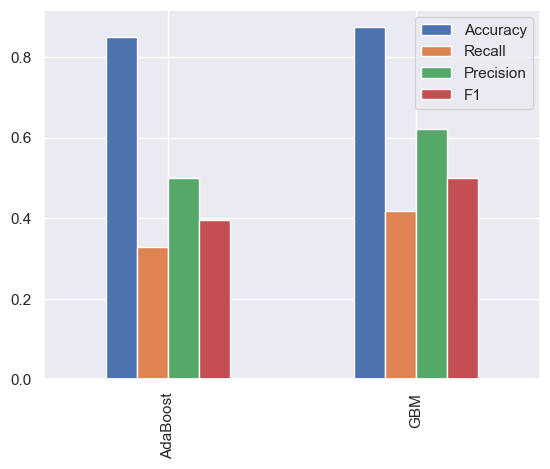

In [124]:
# Plot tuned results
tuned_results.T.plot(kind='bar')

Overall, GBM is the better model.


Save model. Re-load model then predict on test data.

In [125]:
import joblib

#  Save model as pkl file
joblib.dump(gbm_tuned, 'models/gbm.pkl')

['models/gbm.pkl']

In [126]:
# Load model
loaded_gbm = joblib.load('models/gbm.pkl')

In [127]:
# Evaluate model on test data
gbm_results_test = evaluate_model(loaded_gbm, X_test_scaled, y_test)
gbm_results_test

{'Accuracy': 0.8719101123595505,
 'Recall': 0.4925373134328358,
 'Precision': 0.5892857142857143,
 'F1': 0.5365853658536586}

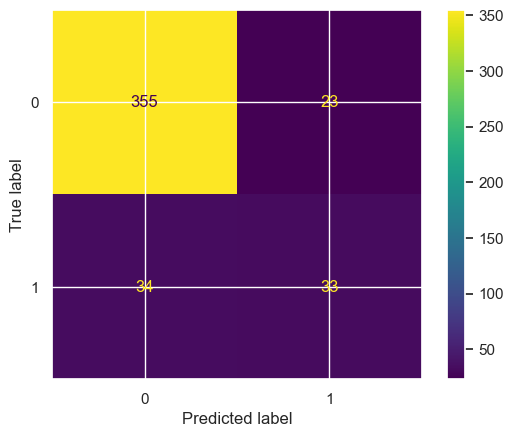

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predicitons
preds_gbm = loaded_gbm.predict(X_test_scaled)

# Create confusion matrix
cm_gbm = confusion_matrix(y_test, preds_gbm)

# Plot confusion matrix
ConfusionMatrixDisplay(cm_gbm).plot()